import pandas as pd

df = pd.read_csv("./Data/10152019_Compiled_Lung_Data_KCS.csv")
dfimport pandas as pd

df = pd.read_csv("10152019_Compiled_Lung_Data_KCS.csv")
df# This notebook contains the code for compiling the Lung dataset for BIOEN 6900

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.style as style

In [3]:
# Importing data file paths
data_file_paths = glob.glob('./Data/*/*.data.txt')

In [2]:
# looking for all text files called annotation.txt
count = []
for i in range(len(data_file_paths)):
    if 'annotations.txt' in data_file_paths[i]:
        count.append(i)
print(len(count))

NameError: name 'data_file_paths' is not defined

In [5]:
%%time
# Compiling data
for i in range(len(data_file_paths)):
#     reading in the data
    df_temp = pd.read_csv(data_file_paths[i], delim_whitespace = True)
#     pulling the file name
    df_temp['File_Name'] = df_temp.columns[2]
#     removing unneeded column 'REF'
    df_temp.drop(['REF', df_temp.columns[2]], inplace = True, axis = 1)
#     Adding Genes column and reseting index
    df_temp['Genes'] = df_temp.index
    df_temp.reset_index(inplace = True, drop = True)
#     Removing unnecissary row
    df_temp = df_temp.iloc[1:, :]
#     appenind and creating data dataframe.
    if i == 0:
        df_final = df_temp.copy()
    else:
        df_final = df_final.append(df_temp, ignore_index = True)

# Verifying correct dimensions. Expecting 12042*134 rows = 1613628 and 3 columns
print(df_final.shape)       

(1613628, 3)
Wall time: 5.83 s


In [6]:
# reordering columns
df_final = df_final[["Genes", "Hybridization", "File_Name"]]
df_final.tail()

,Genes,Hybridization,File_Name
1613623,RPS27,13.0497676361588,SPANS_p_TCGA_Batch60_62_Expr_HT_HG-U133A_24-HT...
1613624,SNRPD2,11.1476032145366,SPANS_p_TCGA_Batch60_62_Expr_HT_HG-U133A_24-HT...
1613625,SLC39A6,8.63310875494072,SPANS_p_TCGA_Batch60_62_Expr_HT_HG-U133A_24-HT...
1613626,CTSC,11.5495870443967,SPANS_p_TCGA_Batch60_62_Expr_HT_HG-U133A_24-HT...
1613627,AQP7,3.42597701103285,SPANS_p_TCGA_Batch60_62_Expr_HT_HG-U133A_24-HT...


In [79]:
# Importing metadata info to get correct patient id's and merge with file_name of our data. 
metadata_info = pd.read_csv("broad.mit.edu_LUSC.HT_HG-U133A.sdrf.txt", sep='\t')
metadata_info.head()

,Extract Name,Comment [TCGA Barcode],Protocol REF,Labeled Extract Name,Label,Term Source REF,Protocol REF.1,Hybridization Name,Array Design REF,Term Source REF.1,...,Comment [TCGA Include for Analysis].1,Comment [md5].1,Protocol REF.4,Normalization Name.1,Derived Array Data Matrix File.1,Comment [TCGA Archive Name].2,Comment [TCGA Data Type].2,Comment [TCGA Data Level].2,Comment [TCGA Include for Analysis].2,Comment [md5].2
0,2e80dca3-a254-4405-a91e-83e437780419,TCGA-37-4141-01A-02R-1101-01,broad.mit.edu:labeling:HT_HG-U133A:01,TCGA-37-4141-01A-02R-1101-01,biotin,MGED Ontology,broad.mit.edu:hybridization:HT_HG-U133A:01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,Affymetrix.com:PhysicalArrayDesign:HT_HG-U133A,caArray,...,yes,03d23f6be566d0afa2d33058bf6e42a4,broad.mit.edu:gene_rma:HT_HG-U133A:01,TCGA-37-4141-01A-02R-1101-01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,broad.mit.edu_LUSC.HT_HG-U133A.Level_3.53.1005.0,Expression-Gene,Level 3,yes,7fc682bea0a4471e9601f63c7382ef5e
1,8316f2f9-440f-4bcd-a2bc-3e0103dbb423,TCGA-18-4083-01A-01R-1101-01,broad.mit.edu:labeling:HT_HG-U133A:01,TCGA-18-4083-01A-01R-1101-01,biotin,MGED Ontology,broad.mit.edu:hybridization:HT_HG-U133A:01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,Affymetrix.com:PhysicalArrayDesign:HT_HG-U133A,caArray,...,yes,d97c861f148cdc987f0cc6246739dfd1,broad.mit.edu:gene_rma:HT_HG-U133A:01,TCGA-18-4083-01A-01R-1101-01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,broad.mit.edu_LUSC.HT_HG-U133A.Level_3.53.1005.0,Expression-Gene,Level 3,yes,f840a6a99651e574e02b7e715ad4b9d9
2,90fbdc22-29ea-4e43-aa0b-4d693cbe4b38,TCGA-51-4079-01A-01R-1101-01,broad.mit.edu:labeling:HT_HG-U133A:01,TCGA-51-4079-01A-01R-1101-01,biotin,MGED Ontology,broad.mit.edu:hybridization:HT_HG-U133A:01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,Affymetrix.com:PhysicalArrayDesign:HT_HG-U133A,caArray,...,yes,ce98f920c47ae121950b5aca955f56ea,broad.mit.edu:gene_rma:HT_HG-U133A:01,TCGA-51-4079-01A-01R-1101-01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,broad.mit.edu_LUSC.HT_HG-U133A.Level_3.53.1005.0,Expression-Gene,Level 3,yes,214ae0227b7804fc5be6a34525bedf47
3,7fb85aa6-6c05-4f02-b68d-52084e2a304c,TCGA-18-4086-01A-01R-1101-01,broad.mit.edu:labeling:HT_HG-U133A:01,TCGA-18-4086-01A-01R-1101-01,biotin,MGED Ontology,broad.mit.edu:hybridization:HT_HG-U133A:01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,Affymetrix.com:PhysicalArrayDesign:HT_HG-U133A,caArray,...,yes,9a5bc923082c2d02ffe5df85618b00f3,broad.mit.edu:gene_rma:HT_HG-U133A:01,TCGA-18-4086-01A-01R-1101-01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,broad.mit.edu_LUSC.HT_HG-U133A.Level_3.53.1005.0,Expression-Gene,Level 3,yes,1f33b18fb3122e9acacbf298fc1372af
4,19a039c8-1c8b-45ec-bab5-0886a9217cad,TCGA-51-4080-01A-01R-1101-01,broad.mit.edu:labeling:HT_HG-U133A:01,TCGA-51-4080-01A-01R-1101-01,biotin,MGED Ontology,broad.mit.edu:hybridization:HT_HG-U133A:01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,Affymetrix.com:PhysicalArrayDesign:HT_HG-U133A,caArray,...,yes,41f6ed93cddf9c0f380a2d3a8b9fdff2,broad.mit.edu:gene_rma:HT_HG-U133A:01,TCGA-51-4080-01A-01R-1101-01,MULEY_p_TCGA_b53and79_Expr_HT_HG-U133A_24-HTA_...,broad.mit.edu_LUSC.HT_HG-U133A.Level_3.53.1005.0,Expression-Gene,Level 3,yes,46d7f3bed1e25435954a0ff84dd21897


In [8]:
df_final.shape

(1613628, 3)

In [9]:
# Doing inner merge on our data on File_Name in df_final and Hybridization Name from metadate_info. I am only pulling the relavate columns
df_final = pd.merge(df_final, metadata_info[["Hybridization Name", "Comment [TCGA Barcode]"]], left_on="File_Name", right_on="Hybridization Name", how="inner")

In [10]:
# looking to see if dataframe has 5 columns

df_final.shape

(1613628, 5)

In [17]:
df_clinical_data = pd.read_csv("nationwidechildrens.org_clinical_patient_lusc.txt", sep="\t")
df_clinical_data.head()

,bcr_patient_uuid,bcr_patient_barcode,form_completion_date,histologic_diagnosis,prospective_collection,retrospective_collection,gender,race,ethnicity,laterality,...,pos_lymph_node_location,pos_lymph_node_location_other,primary_lymph_node_presentation_assessment,prior_aids_conditions,project_code,stage_other,targeted_molecular_therapy,tissue_source_site,tumor_tissue_site,weight
0,bcr_patient_uuid,bcr_patient_barcode,form_completion_date,diagnosis,tissue_prospective_collection_indicator,tissue_retrospective_collection_indicator,gender,race,ethnicity,laterality,...,pos_lymph_node_location,pos_lymph_node_location_other,primary_lymph_node_presentation_assessment,prior_aids_conditions,project_code,stage_other,targeted_molecular_therapy,tissue_source_site,tumor_tissue_site,weight
1,CDE_ID:,CDE_ID:2673794,CDE_ID:,CDE_ID:3081932,CDE_ID:3088492,CDE_ID:3088528,CDE_ID:2200604,CDE_ID:2192199,CDE_ID:2192217,CDE_ID:827,...,CDE_ID:3151519,CDE_ID:3151522,CDE_ID:2200396,CDE_ID:2679581,CDE_ID:,CDE_ID:2007104,CDE_ID:2785850,CDE_ID:,CDE_ID:3427536,CDE_ID:651
2,95b83006-02c9-4c4d-bf84-a45115f7d86d,TCGA-18-3406,2011-3-9,Lung Squamous Cell Carcinoma,NO,YES,MALE,WHITE,NOT HISPANIC OR LATINO,[Not Available],...,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],18,Lung,[Not Available]
3,4e1ad82e-23c8-44bb-b74e-a3d0b1126b96,TCGA-18-3407,2011-3-9,Lung Squamous Cell Carcinoma,NO,YES,MALE,ASIAN,NOT HISPANIC OR LATINO,[Not Available],...,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],18,Lung,[Not Available]
4,d4bc755a-2585-4529-ae36-7e1d88bdecfe,TCGA-18-3408,2011-3-9,Lung Squamous Cell Carcinoma,NO,YES,FEMALE,WHITE,NOT HISPANIC OR LATINO,[Not Available],...,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],18,Lung,[Not Available]


In [12]:
df_final["patient_id"] = df_final["Comment [TCGA Barcode]"].str.slice(0, 12)

In [13]:
df_final.shape

(1613628, 6)

In [14]:
# Merging clinical data 
df_final = pd.merge(df_final, df_clinical_data, left_on="patient_id", right_on="bcr_patient_barcode", how="inner")

In [18]:
df_final.shape

(1613628, 114)

In [19]:
# df_final.to_csv("All_Data_Merged_Final_191026_KCS.csv")

In [16]:
# df_all = pd.read_csv("All_Data_Merged_Final_191026_KCS.csv")
# df_all.drop(columns="Unnamed: 0", inplace=True)

In [18]:
df_final_wide = df_all.pivot_table(index = "Genes",
                          columns = "patient_id_x", values = 'Hybridization' )

In [19]:
df_final_wide.shape

(12042, 133)

In [20]:
df_final_wide.head()

patient_id_x,TCGA-18-3406,TCGA-18-3407,TCGA-18-3408,TCGA-18-3409,TCGA-18-3410,TCGA-18-3411,TCGA-18-3412,TCGA-18-3414,TCGA-18-3415,TCGA-18-3416,...,TCGA-66-2787,TCGA-66-2788,TCGA-66-2789,TCGA-66-2790,TCGA-66-2791,TCGA-66-2792,TCGA-66-2793,TCGA-66-2794,TCGA-66-2795,TCGA-66-2800
Genes,,,,,,,,,,,,,,,,,,,,,
A2BP1,4.634907,4.517374,4.561857,5.491798,4.484155,4.579566,4.985053,4.346768,4.682604,4.421645,...,4.631918,4.446200,4.661927,4.382035,4.432598,4.483351,4.937301,4.636980,4.458005,4.642725
A2M,9.945389,10.461225,10.459502,11.231602,9.241135,9.240676,9.022621,9.286363,9.172622,9.225470,...,9.897507,9.774675,11.012002,10.157913,10.167473,9.191995,8.603678,9.360245,9.808227,10.310943
A4GALT,4.908542,5.825409,6.493590,4.757618,5.310021,6.111393,6.058023,5.485723,5.355027,5.194006,...,5.869621,5.694630,5.002871,4.921737,5.054557,5.599808,4.630739,6.178497,5.408720,6.304635
A4GNT,3.850567,3.929685,3.742324,3.965913,3.847392,4.018456,3.985255,3.849320,3.984934,3.964475,...,3.730406,3.937286,3.936573,3.722193,3.832192,3.943361,3.912164,3.729921,3.999346,3.794237
AAAS,4.054849,4.362556,4.302082,4.585022,4.601447,4.704202,4.424497,4.397497,4.301579,4.715652,...,4.378138,4.183672,4.482287,4.656760,4.455870,4.566780,4.782457,4.706372,4.321004,4.797685


In [21]:
df_final_wide.columns

Index(['TCGA-18-3406', 'TCGA-18-3407', 'TCGA-18-3408', 'TCGA-18-3409',
       'TCGA-18-3410', 'TCGA-18-3411', 'TCGA-18-3412', 'TCGA-18-3414',
       'TCGA-18-3415', 'TCGA-18-3416',
       ...
       'TCGA-66-2787', 'TCGA-66-2788', 'TCGA-66-2789', 'TCGA-66-2790',
       'TCGA-66-2791', 'TCGA-66-2792', 'TCGA-66-2793', 'TCGA-66-2794',
       'TCGA-66-2795', 'TCGA-66-2800'],
      dtype='object', name='patient_id_x', length=133)

In [22]:
df_final_wide_attributes = pd.merge(df_final_wide.transpose(), df_clinical_data, left_index=True, right_on=df_clinical_data.bcr_patient_barcode, how='inner')

In [23]:
# df_final_wide_attributes.to_csv("102919_data_and_attributes.csv", index=False)

## Running Svd

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.style as style
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import scipy
init_notebook_mode(connected=True)

In [4]:
df_final_wide = pd.read_csv('102919_data_and_attributes.csv', encoding='utf8', engine='python')

In [5]:
# Styleizing Plots
style.use('seaborn-paper')
style.use('ggplot')
sns.set_style('whitegrid')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['red','black','green']
)


In [6]:
df_final_wide.loc[(df_final_wide.tobacco_smoking_year_started == "[Not Available]") & (df_final_wide.tobacco_smoking_year_stopped == "[Not Available]"), "Smoker_yes_no"] = 'no'

In [7]:
df_final_wide.loc[~(df_final_wide.tobacco_smoking_year_started == "[Not Available]") & ~(df_final_wide.tobacco_smoking_year_stopped == "[Not Available]"), "Smoker_yes_no"] = 'yes'

In [8]:
df_final_wide.Smoker_yes_no.fillna('yes', inplace=True)

In [9]:
df_final_wide.loc[df_final_wide.anatomic_organ_subdivision.str.slice(0,1) == 'R', "Lung_Location"] = "right"

In [10]:
df_final_wide.loc[df_final_wide.anatomic_organ_subdivision.str.slice(0,1) == 'L', "Lung_Location"] = "left"

In [11]:
df_final_wide.loc[df_final_wide.anatomic_organ_subdivision.str.contains('Lower'), "Lung_Hemispheres"] = "Lower"

In [12]:
df_final_wide.loc[df_final_wide.anatomic_organ_subdivision.str.contains('Upper'), "Lung_Hemispheres"] = "Upper"

In [13]:
df_final_wide.loc[(df_final_wide.loc[:, "ajcc_nodes_pathologic_pn"] == 'N0'), 'node_metastasis_yes_no'] = 'no'

In [14]:
df_final_wide.loc[~(df_final_wide.loc[:, "ajcc_nodes_pathologic_pn"] == 'N0'), 'node_metastasis_yes_no'] = 'yes'

In [16]:
df_final_wide.sort_values(by='Lung_Hemispheres', ascending=False, inplace=True)
df_final_wide.reset_index(inplace=True, drop=True)
# df_final_wide.index = df_final_wide.key_0
df_svd = df_final_wide.iloc[:,1: 12043].transpose().values
df_svd = df_svd.astype('float')
u, s, v = np.linalg.svd(df_svd, full_matrices=False)
s = np.diag(s)
print(np.max(np.abs(df_svd-np.linalg.multi_dot([u,s,v]))))
unique, counts = np.unique(np.diag(s), return_counts = True)
counted_vals = dict(zip(unique, counts))
print(len(counted_vals))

4.4497738826976274e-13
133


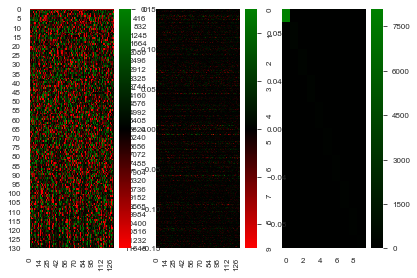

In [17]:
fig, ax = plt.subplots(1, 3)
sns.heatmap(v[:, :], cmap=cmap, vmin=-0.15, vmax=0.15, ax = ax[0])
# sns.heatmap(v[:, :], center=0, cmap=cmap, ax = ax[0])
# sns.heatmap(v[:, :], cmap=cmap, ax = ax[0])
sns.heatmap(u[:, :], cmap=cmap, vmin=-0.10, vmax=0.10, ax = ax[1])
sns.heatmap(s[:10, :10], cmap=cmap, center = 0, ax = ax[2])


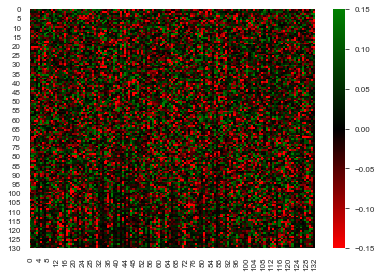

In [18]:
sns.heatmap(v[:, :], cmap=cmap, vmin=-0.15, vmax=0.15)

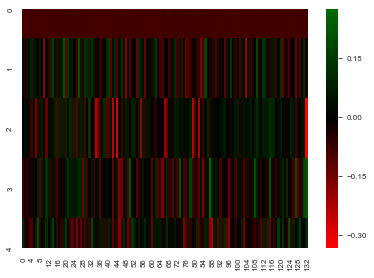

In [19]:
sns.heatmap(v[0:5, :], cmap=cmap, center=0)

In [20]:
v_df = pd.DataFrame(v[1, :])

In [22]:
v_df['Lung_Hemispheres'] = df_final_wide.loc[:, 'Lung_Hemispheres'].transpose()

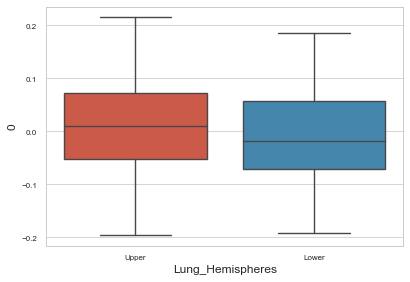

In [24]:
sns.boxplot(x=v_df.Lung_Hemispheres, y=v_df.iloc[:, 0])

In [29]:
temp_stats=scipy.stats.mannwhitneyu(x=v_df[v_df.Lung_Hemispheres=='Upper'].iloc[:, 0], 
                         y=v_df[v_df.Lung_Hemispheres=='Lower'].iloc[:, 0])
temp_stats[1]

0.054807884535633365

In [38]:
# v_df['Lung_Hemispheres'] = v_df.index
# v_df.reset_index(drop=True, inplace=True)

In [39]:
# v_df.iloc[:, 133].replace(np.nan, "Not Available", True)

In [40]:
# annotations_temp = dict(x=1,
#      y=-0.6,
#      text=f"n={v_df.iloc[:, 133].value_counts().values}",
#      showarrow=False,
#      xref="x",
#      yref="y")

In [41]:
# fig = go.Figure()
# for i in range(len(v_df.iloc[:, 133].unique())):
#     fig.add_trace(go.Box(y=pd.melt(v_df[v_df.iloc[1, 133] == v_df.iloc[:, 133].unique()[i]].iloc[:, 0:132]).value, 
#                         name=v_df.iloc[:, 133].unique()[i], boxpoints='suspectedoutliers', hoverinfo="all"))
    
# fig.update_layout(template="plotly_white", title=f"Gene Expression Values by {v_df.columns[133]}", annotations=[annotations_temp])    
# plot(fig, '/temp.html')

'temp-plot.html'

In [23]:
# fig = [
#     go.Heatmap(
#         x=v_df.columns[0:133],
#         y=v_df.index,
#         z=v_df.values[:, 0:133],
#         colorscale=[[0, "red"],[0.5, 'black'], [1, 'green']],
#         hoverinfo='all'
#     )
# ]
# plot(fig, 'fig.html')

'temp-plot.html'

In [124]:
# def plot_svd(data, column_of_interest):
#     data.sort_values(by=column_of_interest, ascending=False, inplace=True)
#     # df_final_wide.index = df_final_wide.key_0
#     df_svd = data.iloc[:,1: 12043].transpose().values
#     df_svd = df_svd.astype('float')
#     u, s, v = np.linalg.svd(df_svd, full_matrices=False)
#     s = np.diag(s)
#     print(np.max(np.abs(df_svd-np.linalg.multi_dot([u,s,v]))))
#     unique, counts = np.unique(np.diag(s), return_counts = True)
#     counted_vals = dict(zip(unique, counts))
#     print(len(counted_vals))
    
# #     seaborn heatmaps
#     fig, ax = plt.subplots(1, 3)
#     # sns.heatmap(v[:, :], cmap=cmap, vmin=-0.15, vmax=0.15, ax = ax[0])
#     sns.heatmap(v[:, :], center=0, cmap=cmap, ax = ax[0])
#     # sns.heatmap(v[:, :], cmap=cmap, ax = ax[0])
#     sns.heatmap(u[:, :], cmap=cmap, vmin=-0.10, vmax=0.10, ax = ax[1])
#     sns.heatmap(s[:10, :10], cmap=cmap, center = 0, ax = ax[2])
    
#     sns.heatmap(v[:, :], center=0, cmap=cmap)
#     plt.show()
#     v_df = pd.DataFrame(v)
#     v_df[f"{column_of_interest}"] = data.loc[:, column_of_interest].transpose()
#     v_df.sort_values(by=column_of_interest, inplace=True, ascending=False)
    
# #     Plot Heatmap
#     fig = [
#     go.Heatmap(
#         x=v_df.columns[0:133],
#         y=v_df.index,
#         z=v_df.values[:, 0:133],
#         colorscale=[[0, "red"],[0.5, 'black'], [1, 'green']],
#         hoverinfo='all'
#         )
#     ]
#     plot(fig, f'Graphs/temp_heatmap_{column_of_interest}.html')
    
# #     replacing nans with "Not Available"
#     v_df.loc[:, column_of_interest].replace(np.nan, "Not Available", True)
    
# #     adding counts to plots
#     annotations_temp = dict(x=1,
#      y=-0.6,
#      text=f"n={v_df.loc[:, column_of_interest].value_counts().values}",
#      showarrow=False,
#      xref="x",
#      yref="y")
    
    
#     fig = go.Figure()
#     for i in range(len(v_df.loc[:, column_of_interest].unique())):
#         fig.add_trace(go.Box(y=pd.melt(v_df[v_df.loc[:, column_of_interest] == v_df.loc[:, column_of_interest].unique()[i]].iloc[:, 0:132]).value, 
#                             name=v_df.loc[:, column_of_interest].unique()[i], boxpoints='suspectedoutliers', hoverinfo="all"))

#     fig.update_layout(template="plotly_white", title=f"Gene Expression Values by {v_df.columns[133]}", annotations=[annotations_temp])    
#     plot(fig, f'./Graphs/temp_boxplot_{column_of_interest}.html')
#     return v_df


3.268496584496461e-13
133


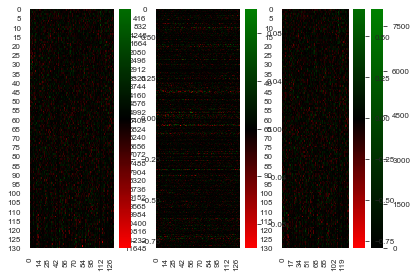

In [125]:
# test = plot_svd(df_final_wide, 'gender')